## Clean Text

In [174]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv

--2022-04-05 14:48:59--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.34
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3501243 (3.3M) [text/csv]
Saving to: ‘text_2_clean.csv.2’

text_2_clean.csv.2  100%[===================>]   3.34M  5.38MB/s    in 0.6s    

2022-04-05 14:49:01 (5.38 MB/s) - ‘text_2_clean.csv.2’ saved [3501243/3501243]



In [175]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [176]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd.read_csv('text_2_clean.csv') 
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [178]:
df["sentiment"].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [179]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [183]:
df.drop(df.loc[df['sentiment']=="neutral"].index, inplace=True)    # elimino le righe di una colonna che hanno un determinato valore 

In [184]:
df.replace({'sentiment':{'negative':0,'positive':1}}, inplace=True) # sempre dopo, così

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16363 entries, 1 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         16363 non-null  object
 1   text           16363 non-null  object
 2   selected_text  16363 non-null  object
 3   sentiment      16363 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [186]:
df

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,1
...,...,...,...,...
27475,b78ec00df5,enjoy ur night,enjoy,1
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,1


In [187]:
df['text'].to_list()

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 '2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'Uh oh, I am sunburned',
 ' S`ok, trying to plot alternatives as we speak *sigh*',
 'i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... http://tinyurl.com/mnf4kw',
 'is back home now      gonna miss every one',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted',
 '  I`m sorry.',
 'On the 

In [188]:
df['text'].isnull().sum()

0

In [189]:
#Cleaning the text using Regular Expressions
import re

df["text"] = df["text"].fillna('').apply(str)
df["text"] = df["text"].str.lower()   # tutto minuscolo
df["text"] = df["text"].apply(lambda x: re.sub('http\S+','',x))  #tutto quello che inizia con http lo sostituiamo
df["text"] = df["text"].apply(lambda x: re.sub('\w*\d\w*"','',x))  #caratteri insieme a numeri 
df["text"] = df["text"].apply(lambda x: re.sub('[.,!?:;-=...@#_]','',x))   # insieme di caratteri speciali 
df["text"] = df["text"].str.replace('[^\w\s]','')   # tutto ciò che non è alfanumerico e che ha  più di uno spazio
df["text"] = df["text"].str.replace('\d+', '')   # se ci sono dei numeri lo eliminiamo
df["text"] = df["text"].str.replace(' +',' ')  # se ci sono più spazi lo sostituiso con uno

In [190]:
df["text"].to_list()

[' sooo sad i will miss you here in san diego',
 'my boss is bullying me',
 ' what interview leave me alone',
 ' sons of why couldnt they put them on the releases we already bought',
 'am feedings for the baby are fun when he is all smiles and coos',
 ' journey wow u just became cooler hehe is that possible',
 'i really really like the song love story by taylor swift',
 'my sharpie is running dangerously low on ink',
 'i want to go to music tonight but i lost my voice',
 'uh oh i am sunburned',
 ' sok trying to plot alternatives as we speak sigh',
 'ive been sick for the past few days and thus my hair looks wierd if i didnt have a hat on it would look ',
 'is back home now gonna miss every one',
 'playing ghost online is really interesting the new updates are kirin pet and metamorph for third job cant wait to have a dragon pet',
 'the free fillin app on my ipod is fun im addicted',
 ' im sorry',
 'on the way to malaysiano internet access to twit',
 'juss came backk from berkeleyy omg i

In [191]:
#Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
list1= list(stopwords.words('english'))
list1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [193]:
list2= ['words which you want to remove']
list3= list1+list2

df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (list3)]))

df["text"].to_list()

['sooo sad miss san diego',
 'boss bullying',
 'interview leave alone',
 'sons couldnt put releases already bought',
 'feedings baby fun smiles coos',
 'journey wow u became cooler hehe possible',
 'really really like song love story taylor swift',
 'sharpie running dangerously low ink',
 'want go music tonight lost voice',
 'uh oh sunburned',
 'sok trying plot alternatives speak sigh',
 'ive sick past days thus hair looks wierd didnt hat would look',
 'back home gonna miss every one',
 'playing ghost online really interesting new updates kirin pet metamorph third job cant wait dragon pet',
 'free fillin app ipod fun im addicted',
 'im sorry',
 'way malaysiano internet access twit',
 'juss came backk berkeleyy omg madd fun havent minute whassqoodd',
 'went sleep power cut noida power back working',
 'im going home seen new twitter design quiteheavenly',
 'hope unni make audition fighting dahye unni',
 'consolation got bmi tested hahaha says obesed well much unhappy minutes',
 'thats fu

In [194]:
#Removing un common words

freq=pd.Series(' '.join(df["text"]).split()).value_counts()[-3000:]

df["text"] = df["text"].apply(lambda x:" ".join(x for x in x.split() if x not in freq))
df["text"] = df["text"].apply(lambda x:" ".join(x for x in x.split() if len(x) < 12))
df["text"] = df["text"].apply(lambda x:" ".join(x for x in x.split() if len(x) > 3))
df["text"].to_list()

['sooo miss diego',
 'boss bullying',
 'interview leave alone',
 'sons couldnt releases already bought',
 'feedings baby smiles coos',
 'journey became cooler hehe possible',
 'really really like song love story taylor swift',
 'sharpie running dangerously',
 'want music tonight lost voice',
 'sunburned',
 'trying plot speak sigh',
 'sick past days thus hair looks wierd didnt would look',
 'back home gonna miss every',
 'playing ghost online really interesting updates kirin metamorph third cant wait dragon',
 'free fillin ipod addicted',
 'sorry',
 'malaysiano internet access twit',
 'juss came backk berkeleyy madd havent minute whassqoodd',
 'went sleep power noida power back working',
 'going home seen twitter design',
 'hope unni make audition fighting dahye unni',
 'consolation tested hahaha says obesed well much unhappy minutes',
 'thats funny cute kids',
 'born raised living texas past years still miss',
 'soooooo sleeeeepy last school',
 'little happy wine jeje itsm free time ca

In [195]:
df

,textID,text,selected_text,sentiment
1,549e992a42,sooo miss diego,Sooo SAD,0
2,088c60f138,boss bullying,bullying me,0
3,9642c003ef,interview leave alone,leave me alone,0
4,358bd9e861,sons couldnt releases already bought,"Sons of ****,",0
6,6e0c6d75b1,feedings baby smiles coos,fun,1
...,...,...,...,...
27475,b78ec00df5,enjoy night,enjoy,1
27476,4eac33d1c0,wish could come denver husband lost cant afford,d lost,0
27477,4f4c4fc327,wondered rake client made clear dont force dev...,", don`t force",0
27478,f67aae2310,good enjoy break probably need hectic weekend ...,Yay good for both of you.,1


In [196]:
df["text"]

1                                          sooo miss diego
2                                            boss bullying
3                                    interview leave alone
4                     sons couldnt releases already bought
6                                feedings baby smiles coos
                               ...                        
27475                                          enjoy night
27476      wish could come denver husband lost cant afford
27477    wondered rake client made clear dont force dev...
27478    good enjoy break probably need hectic weekend ...
27479                                                worth
Name: text, Length: 16363, dtype: object

In [197]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
import nltk
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [198]:
df["text"].apply(lambda document:" ".join([lemma.lemmatize(word) for word in nltk.word_tokenize(document)]))

1                                          sooo miss diego
2                                             bos bullying
3                                    interview leave alone
4                       son couldnt release already bought
6                                   feeding baby smile coo
                               ...                        
27475                                          enjoy night
27476      wish could come denver husband lost cant afford
27477    wondered rake client made clear dont force dev...
27478    good enjoy break probably need hectic weekend ...
27479                                                worth
Name: text, Length: 16363, dtype: object

In [199]:
text

'sooo miss diegobos bullyinginterview leave aloneson couldnt release already boughtfeeding baby smile coojourney became cooler hehe possiblereally really like song love story taylor swiftsharpie running dangerouslywant music tonight lost voicesunburnedtrying plot speak sighsick past day thus hair look wierd didnt would lookback home gon na miss everyplaying ghost online really interesting update kirin metamorph third cant wait dragonfree fillin ipod addictedsorrymalaysiano internet access twitjuss came backk berkeleyy madd havent minute whassqooddwent sleep power noida power back workinggoing home seen twitter designhope unni make audition fighting dahye unniconsolation tested hahaha say obesed well much unhappy minutethats funny cute kidborn raised living texas past year still misssoooooo sleeeeepy last schoollittle happy wine jeje itsm free time care jaja loveavid magazine love magazinelove available dear would love help convert vidsï½blah dunno wan na work hangover suckkkkkk drunk m

In [200]:
X =df["text"]
y=df["sentiment"]


In [201]:
documents = df["text"].to_list()

In [202]:
text = ''.join(documents)

In [203]:
text

'sooo miss diegoboss bullyinginterview leave alonesons couldnt releases already boughtfeedings baby smiles coosjourney became cooler hehe possiblereally really like song love story taylor swiftsharpie running dangerouslywant music tonight lost voicesunburnedtrying plot speak sighsick past days thus hair looks wierd didnt would lookback home gonna miss everyplaying ghost online really interesting updates kirin metamorph third cant wait dragonfree fillin ipod addictedsorrymalaysiano internet access twitjuss came backk berkeleyy madd havent minute whassqooddwent sleep power noida power back workinggoing home seen twitter designhope unni make audition fighting dahye unniconsolation tested hahaha says obesed well much unhappy minutesthats funny cute kidsborn raised living texas past years still misssoooooo sleeeeepy last schoollittle happy wine jeje itsm free time cares jaja loveavid magazine love magazineslove available dear would love help convert vidsï½blah dunno wanna work hangovers suc

(-0.5, 799.5, 399.5, -0.5)

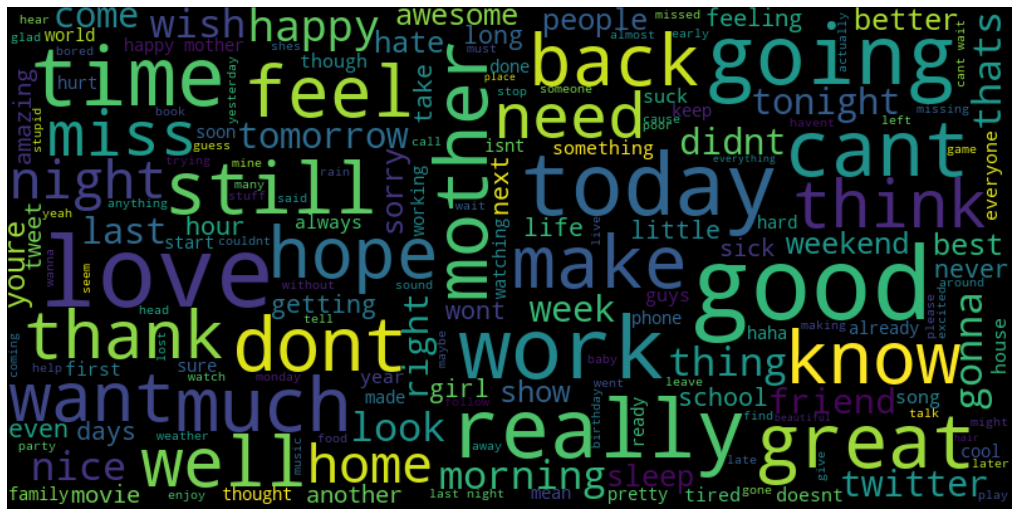

In [204]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [229]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, 
                             stop_words=stopwords.words('english'))
X_ = vectorizer.fit_transform(X).toarray()       #attenzione nella parentesi transform mettere la target
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [254]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [257]:
X_train.shape

(12272, 1500)

In [258]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###RANDOMFORESTCLASSIFIER

>1, train: 0.530, test: 0.512
>2, train: 0.562, test: 0.547
>3, train: 0.605, test: 0.580
>4, train: 0.641, test: 0.612
>5, train: 0.679, test: 0.648
>6, train: 0.710, test: 0.677
>7, train: 0.739, test: 0.699
>8, train: 0.760, test: 0.718
>9, train: 0.774, test: 0.728
>10, train: 0.789, test: 0.746
>11, train: 0.805, test: 0.760
>12, train: 0.837, test: 0.807
>13, train: 0.836, test: 0.810
>14, train: 0.832, test: 0.809
>15, train: 0.831, test: 0.809
>16, train: 0.827, test: 0.808
>17, train: 0.827, test: 0.808
>18, train: 0.830, test: 0.806
>19, train: 0.832, test: 0.807
>20, train: 0.830, test: 0.804


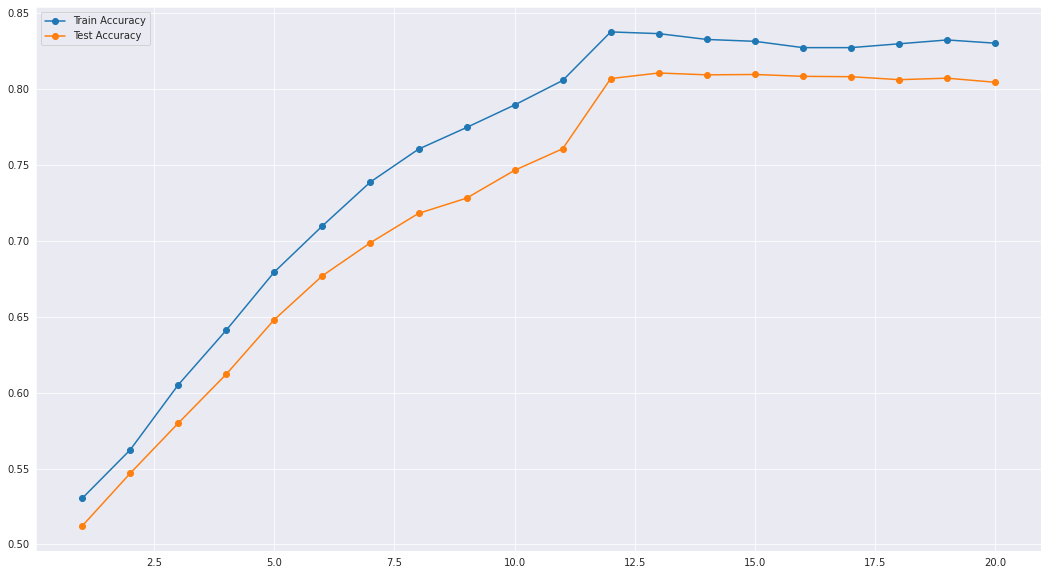

In [259]:
train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=200,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [260]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

In [261]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6538743583475922


###MULTINOMIALNB

In [262]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train) 

MultinomialNB()

In [263]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8120263994133464


In [264]:
labels = ['Negative', 'Positive']

Text(69.0, 0.5, 'Actual')

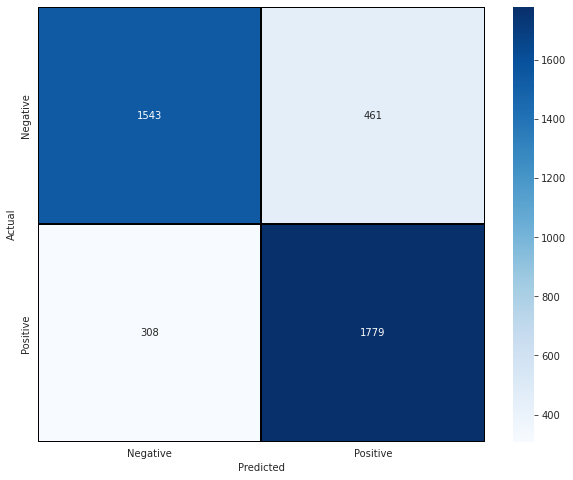

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [266]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.83      0.77      0.80      2004
    Positive       0.79      0.85      0.82      2087

    accuracy                           0.81      4091
   macro avg       0.81      0.81      0.81      4091
weighted avg       0.81      0.81      0.81      4091



In [267]:
!pip install plot-metric --quiet

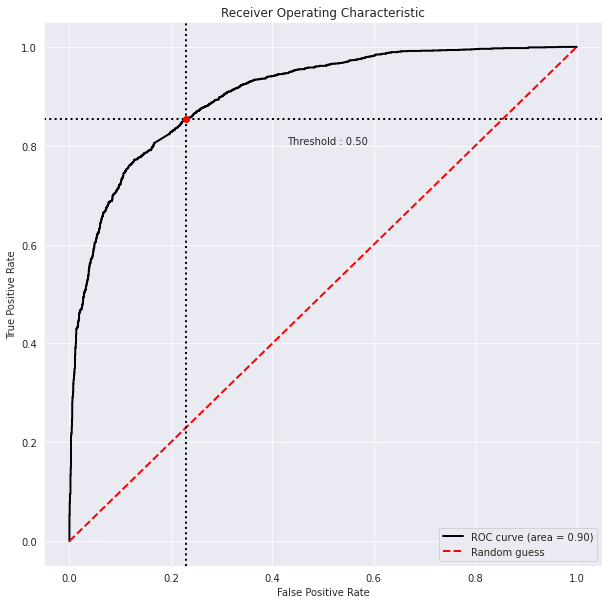

In [268]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

###SGDCLASSIFIER

In [269]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8328037154729895


In [270]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.79      0.89      0.84      2004
    Positive       0.88      0.78      0.83      2087

    accuracy                           0.83      4091
   macro avg       0.84      0.83      0.83      4091
weighted avg       0.84      0.83      0.83      4091



Text(69.0, 0.5, 'Actual')

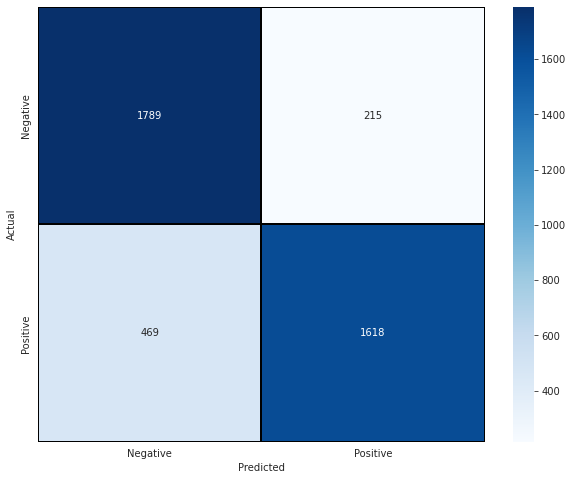

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [272]:
from sklearn.model_selection import train_test_split

X_array = np.array(documents) # Cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_array, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [278]:
from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=stopwords.words('english'))
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

In [279]:
test_data_accuracy = accuracy_score(predicted, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.826203862136397


In [252]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [274]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.79      0.89      0.83      2004
    Positive       0.88      0.77      0.82      2087

    accuracy                           0.83      4091
   macro avg       0.83      0.83      0.83      4091
weighted avg       0.83      0.83      0.83      4091



Text(69.0, 0.5, 'Actual')

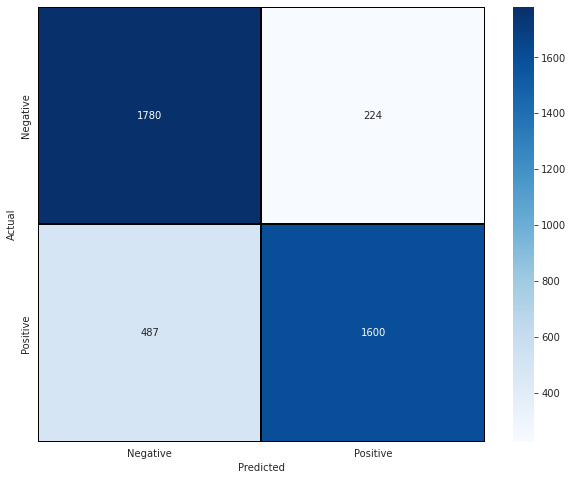

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [277]:
import joblib
joblib.dump(pipe,'pipeline_classifierTF_IDF.pkl')

['pipeline_classifierTF_IDF.pkl']